# Movie Analysis

In [15]:
#import all necessary packages

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

import sqlite3
import zipfile

import warnings
warnings.filterwarnings('ignore')


from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed

from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm


In [16]:
# Read movie budget data from a CSV file
movie_budget = pd.read_csv("data/tn.movie_budgets.csv.gz", sep= ",")

In [17]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
# Create a copy of the 'movie_budget' DataFrame to avoid modifying the original data.
movie_budget_copy = movie_budget.copy()

# Extract the release year from the 'release_date' column and convert it to an integer.
movie_budget_copy['release_year'] = movie_budget_copy['release_date'].str[-4:].astype(int)

# Extract the release month (the first 3 characters) from the 'release_date' column.
movie_budget_copy['release_month'] = movie_budget_copy['release_date'].str[:3]

# Filter the DataFrame to keep only records with a release year greater than or equal to 2000.
movie_budget_copy = movie_budget_copy[movie_budget_copy['release_year'] >= 2000]

# Display the DataFrame with the new 'release_month' column.
movie_budget_copy


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,2004,Dec
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


In [20]:
conn = sqlite3.connect('im.db.zip')
#specify the path to the zip file
zip_file_path = 'data/im.db.zip'

#Extract the SQLite database file from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

#connect to extracted SQLite database
database_path = 'unzippedData/im.db'
conn = sqlite3.connect(database_path)

In [21]:
# Read and store the schema of an SQLite database using a SQL query, 
#then display the schema in the 'schema_df' DataFrame.
schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)


In [22]:
# Retrieve data from the 'movie_basics' table in an SQLite database using SQL, and store it in the 'movie_basic' DataFrame.
movie_basic = pd.read_sql('''
    SELECT *
    FROM movie_basics
''', conn)

movie_basic

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [23]:
# Count the occurrences of each unique 'start_year' in the 'movie_basic' DataFrame, then sort the results by the index.
year_counts = movie_basic["start_year"].value_counts().sort_index()

In [24]:
# Merge two DataFrames, 'movie_budget_copy' and 'movie_basic,' using an inner join.
# Select specific columns from both DataFrames for the merge.
result_sql = pd.merge(
    movie_budget_copy[['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', "release_year", "release_month"]],
    movie_basic[['primary_title', 'original_title', 'start_year', 'genres']],
    left_on='movie', right_on='primary_title', how='inner')

result_sql

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec,Avatar,Abatâ,2011,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,Apr,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
3324,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",2001,Jul,Cure,Cure,2011,Drama
3325,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",2001,Jul,Cure,Cure,2014,None
3326,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",2012,Jan,Newlyweds,Newlyweds,2011,"Comedy,Drama"
3327,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec,Red 11,Red 11,2019,"Horror,Sci-Fi,Thriller"


In [25]:
# Remove dollar signs and commas from the 'worldwide_gross' column and convert it to a float data type.
result_sql['worldwide_gross'] = result_sql['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Remove dollar signs and commas from the 'production_budget' column and convert it to a float data type.
result_sql['production_budget'] = result_sql['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate the return on investment (ROI) by dividing 'worldwide_gross' by 'production_budget' and multiplying by 100.
result_sql['ROI'] = (result_sql['worldwide_gross'] / result_sql['production_budget']) * 100

result_sql

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
0,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2009,Dec,Avatar,Abatâ,2011,Horror,653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2011,May,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,2019,Jun,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,2015,May,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018,Apr,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",682.711400
...,...,...,...,...,...,...,...,...,...,...,...,...
3324,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2011,Drama,945.960000
3325,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2014,None,945.960000
3326,"Jan 13, 2012",Newlyweds,9000.0,"$4,584",4.584000e+03,2012,Jan,Newlyweds,Newlyweds,2011,"Comedy,Drama",50.933333
3327,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00,2018,Dec,Red 11,Red 11,2019,"Horror,Sci-Fi,Thriller",0.000000


In [26]:
# Filter the 'result_sql' DataFrame to include only records where 'start_year' is less than or equal to 2020.
year = result_sql[result_sql['start_year'] <= 2020]
year

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
0,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2009,Dec,Avatar,Abatâ,2011,Horror,653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2011,May,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,2019,Jun,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,2015,May,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018,Apr,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",682.711400
...,...,...,...,...,...,...,...,...,...,...,...,...
3324,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2011,Drama,945.960000
3325,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2014,None,945.960000
3326,"Jan 13, 2012",Newlyweds,9000.0,"$4,584",4.584000e+03,2012,Jan,Newlyweds,Newlyweds,2011,"Comedy,Drama",50.933333
3327,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00,2018,Dec,Red 11,Red 11,2019,"Horror,Sci-Fi,Thriller",0.000000


In [27]:
# Filter the 'result_sql' DataFrame to include only records where 'production_budget' is less than or equal to $80 million.
budget_filter = result_sql[result_sql["production_budget"] <= 80000000.0]

# Further filter the DataFrame to include records where 'ROI' is greater than or equal to 200%.
roi = budget_filter[budget_filter["ROI"] >= 200.0]
roi

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
235,"Apr 23, 2009",Home,500000.0,"$15,433",44793168.0,2009,Apr,Home,Yurt,2011,Drama,8958.6336
236,"Apr 23, 2009",Home,500000.0,"$15,433",44793168.0,2009,Apr,Home,Home,2011,"Documentary,Drama,Family",8958.6336
237,"Apr 23, 2009",Home,500000.0,"$15,433",44793168.0,2009,Apr,Home,Dom,2011,Drama,8958.6336
238,"Apr 23, 2009",Home,500000.0,"$15,433",44793168.0,2009,Apr,Home,Home,2015,"Adventure,Animation,Comedy",8958.6336
239,"Apr 23, 2009",Home,500000.0,"$15,433",44793168.0,2009,Apr,Home,Hemma,2013,"Drama,Romance",8958.6336
...,...,...,...,...,...,...,...,...,...,...,...,...
3312,"Sep 1, 2015",Exeter,25000.0,$0,489792.0,2015,Sep,Exeter,Exeter,2014,Horror,1959.1680
3313,"Sep 1, 2015",Exeter,25000.0,$0,489792.0,2015,Sep,Exeter,Exeter,2015,None,1959.1680
3323,"Apr 28, 2006",Clean,10000.0,"$138,711",138711.0,2006,Apr,Clean,Clean,2017,"Comedy,Drama,Horror",1387.1100
3324,"Jul 6, 2001",Cure,10000.0,"$94,596",94596.0,2001,Jul,Cure,Cure,2011,Drama,945.9600


In [42]:
roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 235 to 3324
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       731 non-null    object 
 1   movie              731 non-null    object 
 2   production_budget  731 non-null    float64
 3   domestic_gross     731 non-null    object 
 4   worldwide_gross    731 non-null    float64
 5   release_year       731 non-null    int64  
 6   release_month      731 non-null    object 
 7   primary_title      731 non-null    object 
 8   original_title     731 non-null    object 
 9   start_year         731 non-null    int64  
 10  genres             723 non-null    object 
 11  ROI                731 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 74.2+ KB


In [44]:
# Drop rows where 'worldwide_gross' or 'production_budget' is 0, as they likely represent unreleased movies.
roi = roi[roi['worldwide_gross'] != 0]
roi = roi[roi['production_budget'] != 0]

# Round the 'ROI' values to one decimal place for clarity.
roi['ROI'] = roi['ROI'].round(1)

# Format 'ROI' as a percentage with one decimal place and then convert it to a floating-point number.
roi['ROI'] = roi['ROI'].apply(lambda x: '{:,.1f}'.format(x))
roi['ROI'] = roi['ROI'].str.replace(',', '').astype(float)

# Remove duplicate movie records, keeping only the first occurrence.
roi.drop_duplicates(subset="movie", keep="first", inplace=True)
roi

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
235,"Apr 23, 2009",Home,500000.0,"$15,433",44793168.0,2009,Apr,Home,Yurt,2011,Drama,8958.6
444,"Mar 23, 2012",The Hunger Games,80000000.0,"$408,010,692",677923379.0,2012,Mar,The Hunger Games,The Hunger Games,2012,"Action,Adventure,Sci-Fi",847.4
445,"May 26, 2011",The Hangover Part II,80000000.0,"$254,464,305",586464305.0,2011,May,The Hangover Part II,The Hangover Part II,2011,"Comedy,Mystery",733.1
446,"Feb 10, 2017",The Lego Batman Movie,80000000.0,"$175,750,384",310660018.0,2017,Feb,The Lego Batman Movie,The Lego Batman Movie,2017,"Action,Animation,Comedy",388.3
447,"Sep 25, 2015",Hotel Transylvania 2,80000000.0,"$169,700,110",469500298.0,2015,Sep,Hotel Transylvania 2,Hotel Transylvania 2,2015,"Animation,Comedy,Family",586.9
...,...,...,...,...,...,...,...,...,...,...,...,...
3305,"Mar 18, 2016",Krisha,30000.0,"$144,822",144822.0,2016,Mar,Krisha,Krisha,2015,Drama,482.7
3310,"Jan 14, 2000",The Terrorist,25000.0,"$195,043",195043.0,2000,Jan,The Terrorist,The Terrorist,2018,Thriller,780.2
3311,"Sep 1, 2015",Exeter,25000.0,$0,489792.0,2015,Sep,Exeter,Exeter,2015,"Horror,Mystery,Thriller",1959.2
3323,"Apr 28, 2006",Clean,10000.0,"$138,711",138711.0,2006,Apr,Clean,Clean,2017,"Comedy,Drama,Horror",1387.1


# STATISTIC / LINEAR REGRESSION MODEL

In [30]:
np.corrcoef(roi['production_budget'], roi['worldwide_gross'])

array([[1.       , 0.6447561],
       [0.6447561, 1.       ]])

- A correlation coefficient of approximately 0.6448 suggests a moderate positive linear relationship between the 'production_budget' and 'worldwide_gross' variables.
- As the correlation coefficient is positive (greater than 0), it indicates that as the 'production_budget' increases, there tends to be an increase in 'worldwide_gross.' In other words, movies with higher production budgets tend to have higher worldwide gross earnings.
- However, the correlation is not very strong (0.6448 is less than 1), so while there is a positive relationship, there is still variability in the data, and other factors may influence worldwide gross earnings as well.

In [31]:
t_statistic, p_value = stats.ttest_ind(roi['production_budget'], roi['worldwide_gross'])
t_statistic, p_value

(-23.548396693975473, 2.387984172557935e-109)

The extremely low p-value (close to zero) indicates that the difference between the 'production_budget' and 'worldwide_gross' is highly statistically significant. Since p-value is less than alpha (0.05). we reject the null so there is a significant difference betweeen production budget and worldwide gross

In [50]:
X = roi['production_budget']
Y = roi['worldwide_gross']
X_plus_c = sm.add_constant(X)
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     558.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           4.22e-92
Time:                        21:56:32   Log-Likelihood:                -14494.
No. Observations:                 731   AIC:                         2.899e+04
Df Residuals:                     729   BIC:                         2.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.571e+07   5.63e+06      2.789      0.005    4.65e+06    2.68e+07
production_budget     4.1761      0.177     23.630      0.000       3.829       4.523
==============================================================================
Omnibus:                      583.254   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12546.463
Skew:                           3.478   Prob(JB):                         0.00
Kurtosis:                      22.067   Cond. No.                     4.91e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

production budget explains 43% of the variation in worldwide gross. p-value is less than 0. Therefore we reject null and find evidence that there is a significant difference in between. it is a very strong correlation. i could say it is weak positive correlation

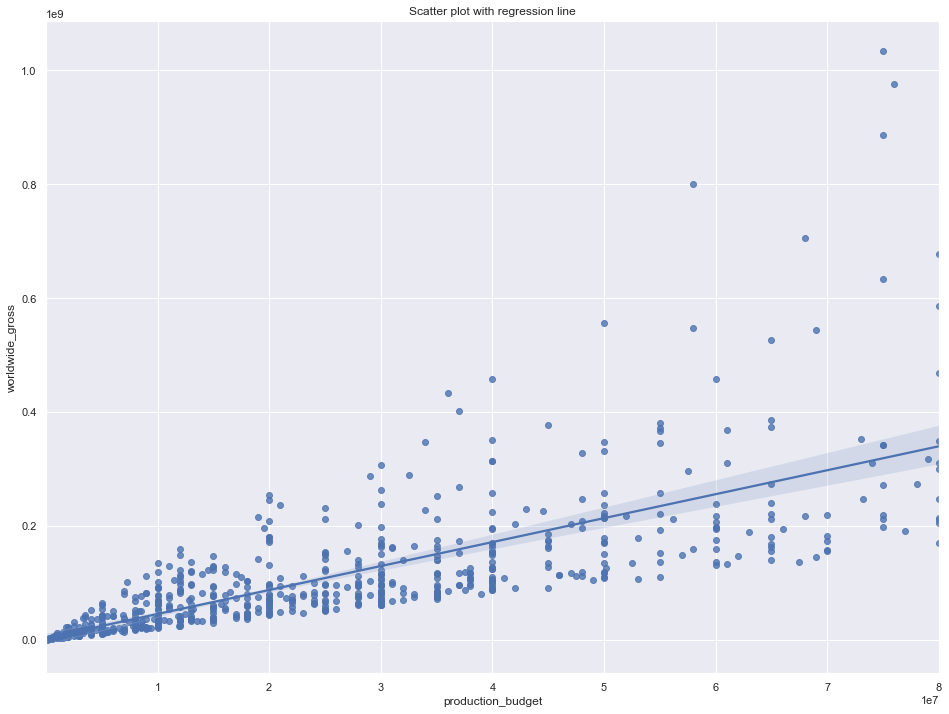

In [86]:
sns.set(rc={'figure.figsize':(16,12)})
plt.title('Scatter plot with regression line')
sns.regplot(x=roi['production_budget'], y=roi['worldwide_gross']);

In [53]:
model.tvalues

const                 2.789066
production_budget    23.630397
dtype: float64

In [54]:
model.pvalues

const                5.423929e-03
production_budget    4.218768e-92
dtype: float64

A small p-value (e.g., 4.2188e-92) for production_budget suggests that this variable is highly statistically significant in explaining the variation in the target variable.
The p-value for const is also relatively small (0.0054), indicating that it is statistically significan

In [55]:
model.mse_total

1.7261126892773774e+16

In [87]:
pd.set_option('display.float_format', lambda x: '{:.1f}'.format(x))

#numbers without scientific notation
print(roi.describe())

       production_budget  worldwide_gross  release_year  start_year    ROI
count              671.0            671.0         671.0       671.0  671.0
mean          25607425.9      111265875.4        2012.6      2013.7  483.4
std           20706284.7      119903413.5           4.2         2.6  279.6
min              10000.0          94596.0        2000.0      2010.0  200.7
25%            9000000.0       36875850.0        2011.0      2011.0  268.6
50%           20000000.0       80504421.0        2013.0      2014.0  383.4
75%           38000000.0      141688882.0        2016.0      2016.0  605.5
max           80000000.0     1034727750.0        2019.0      2020.0 1387.1


In [92]:
# Group the 'roi' DataFrame by the 'genres' column and count the number of movies in each genre.
genre_roi = roi.groupby('genres')['ROI'].count().sort_values(ascending=False)
genre_roi.head(20)

genres
Drama                         42
Comedy,Drama,Romance          31
Comedy,Drama                  30
Documentary                   25
Comedy                        24
Comedy,Romance                24
Adventure,Animation,Comedy    20
Drama,Romance                 19
Action,Crime,Drama            17
Action,Comedy,Crime           14
Biography,Drama,History       12
Horror                        11
Biography,Drama               10
Drama,Thriller                10
Biography,Comedy,Drama        10
Horror,Mystery,Thriller       10
Horror,Thriller                9
Action,Crime,Thriller          8
Drama,Horror,Mystery           8
Action,Thriller                8
Name: ROI, dtype: int64

# VISUALIZATION

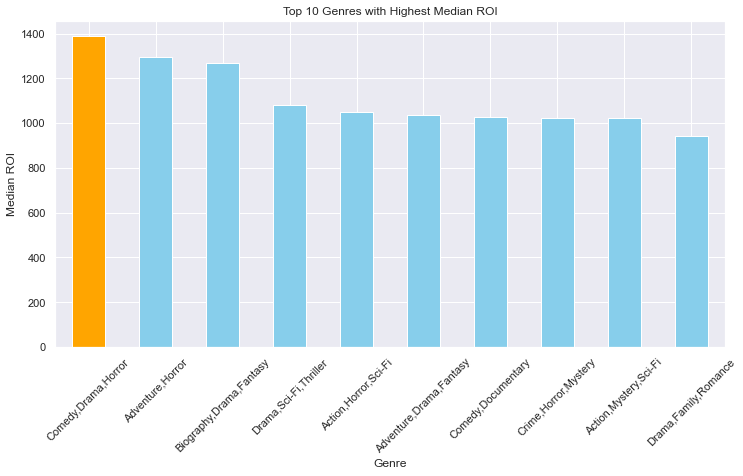

In [94]:
#Analyzing Genres with the Highest Median ROI

genre_roi = roi.groupby('genres')['ROI'].median().sort_values(ascending=False)

top_10_genres = genre_roi.head(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(12, 6))
# Define the colors for the bars
colors = ['skyblue'] * len(top_10_genres)
# Set a different color for the top bar
colors[0] = 'orange'

top_8_genres.plot(kind='bar', color=colors)
plt.title('Top 10 Genres with Highest Median ROI')
plt.xlabel('Genre')
plt.ylabel('Median ROI')
plt.xticks(rotation=45)
plt.show()


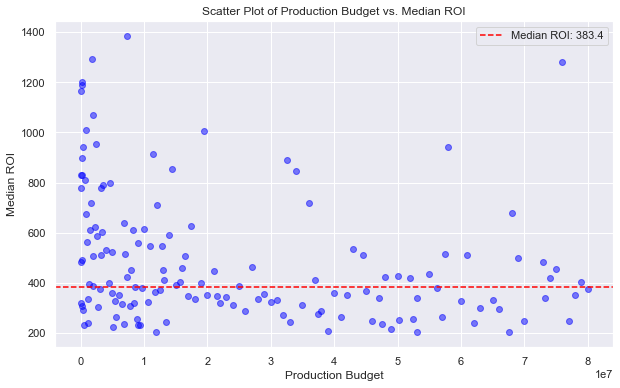

In [82]:
median_roi_all = roi['ROI'].median()

# Calculate the median ROI for each unique production budget
median_roi = roi.groupby('production_budget')['ROI'].median().reset_index()

# Extract data for scatter plot
production_budget = median_roi['production_budget']
median_roi_values = median_roi['ROI']
`
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, median_roi_values, color='blue', alpha=0.5)
plt.axhline(y=median_roi_all, color='red', linestyle='--', label=f'Median ROI: {median_roi_all:.1f}')
plt.title('Scatter Plot of Production Budget vs. Median ROI')
plt.xlabel('Production Budget')
plt.ylabel('Median ROI')
plt.legend()
plt.grid(True)
plt.show()

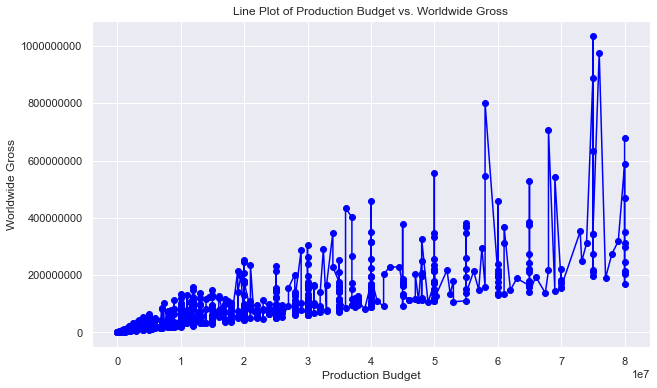

In [83]:
roi_sorted = roi.sort_values(by='production_budget')

# Extract the data
production_budget = roi_sorted['production_budget']
worldwide_gross = roi_sorted['worldwide_gross']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(production_budget, worldwide_gross, color='blue', marker='o', linestyle='-')
plt.title('Line Plot of Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

# Format the y-axis labels to display full numbers, not in scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

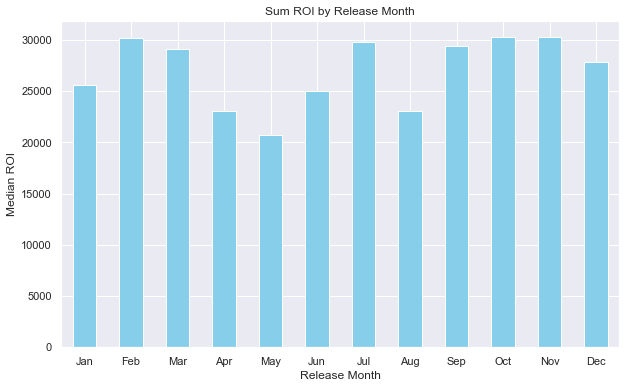

In [88]:
median_roi_by_month = roi.groupby('release_month')['ROI'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a bar plot
plt.figure(figsize=(10, 6))
median_roi_by_month.plot(kind='bar', color='skyblue')
plt.title('Sum ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Median ROI')
plt.xticks(rotation=0)
plt.show()

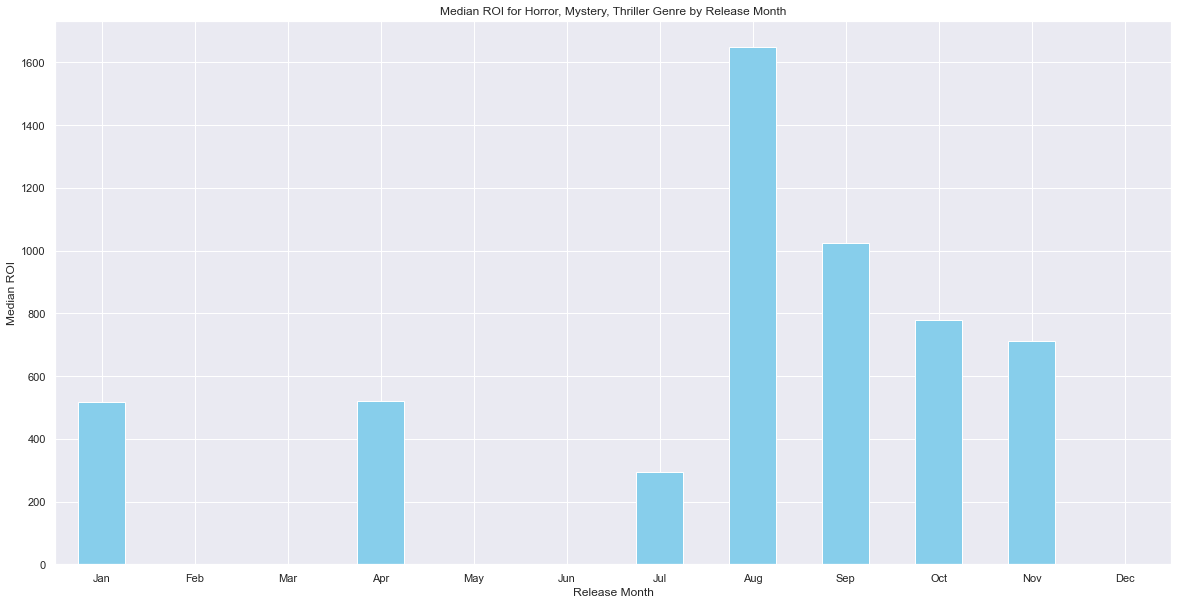

In [89]:
drama_df = roi[roi['genres'].str.contains('Horror,Mystery,Thriller', na=False)]

# Group the filtered data by release month and calculate the median ROI
median_roi_by_month = drama_df.groupby('release_month')['ROI'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a bar plot
plt.figure(figsize=(20, 10))
median_roi_by_month.plot(kind='bar', color='skyblue')
plt.title('Median ROI for Horror, Mystery, Thriller Genre by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Median ROI')
plt.xticks(rotation=0)
plt.show()

In [96]:
# Save the 'roi' DataFrame to a CSV file named "movie_studio_df.csv."
roi.to_csv("movie_studio_df.csv")